In [1]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
# PassengerId: Passenger id
# Survived: 0 <==> No, 1 <==> Yes
# Pclass: 1 <==> 1st, 2 <==> 2nd, 3 <==> 3rd
# Name: Full passenger name
# Sex: Male or female
# Age: Age in years.Age is fractional if less than 1. If the age is estimated, is it in
# the form of xx.5
# SibSp: # of siblings or spouses aboard the Titanic
# Parch: # of parents or children aboard the Titanic. Some children travelled
# only with a nanny, therefore parch=0 for them.
# Ticket: Ticket number
# Fare: Passenger fare
# Cabin: Cabin number
# Embarked: Port of Embarkation, C <==> Cherbourg, Q <==> Queenstown, S
# <==> Southampton

In [4]:
# Read train dataset
train_df = pd.read_csv("/home/shinde/Documents/trainings/Spiced_Academy/Github/tahini-tensor-student-code/spiced_projects/Week2/Project_Week_2/data/titanic/train.csv")
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
# Check the null values and dtypes of the features
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  deck         204 non-null    object 
 13  surname      891 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 97.6+ KB


In [35]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
deck           687
surname          0
dtype: int64

<ipython-input-18-d4f30ea66892>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr(method = "spearman")


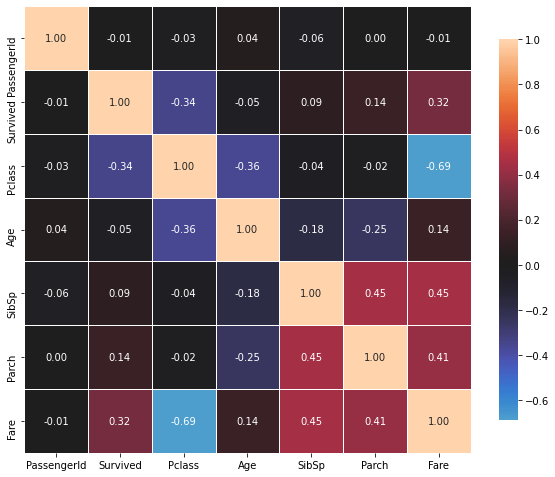

In [18]:
# Plot heatmap showing correlations between the features
def correlation_heatmap(df):
    correlations = df.corr(method = "spearman")
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
correlation_heatmap(train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

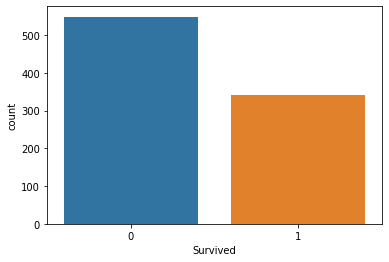

In [8]:
# Plotting the total survived and not survived
sns.countplot(x=train_df["Survived"])

In [9]:
# Get the statistics of the features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/home/shinde/.local/lib/python3.8/site-packages/seaborn/distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

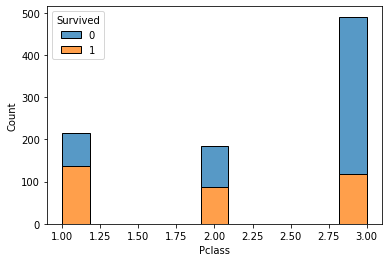

In [17]:
# Is there a relationship between the class and the survival rate ?
sns.histplot(data=train_df, x="Pclass",  hue = "Survived", multiple = "stack")


In [12]:
# Split the initial letter of the cabin column into deck 
train_df["deck"]  = train_df["Cabin"].str[0]


,Pclass,deck,survived_count
0,1,A,15
1,1,B,47
2,1,C,59
3,1,D,29
4,1,E,25
5,1,T,1
6,2,D,4
7,2,E,4
8,2,F,8
9,3,E,3


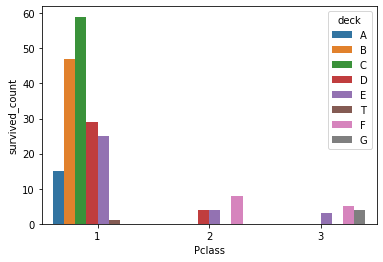

In [32]:
# What is the relationship between the Pclass, deck and number of survived ?

survived_count = pd.DataFrame({'survived_count' :train_df.groupby(['Pclass', "deck"])["Survived"].count()}).reset_index()
sns.barplot(data=survived_count, x="Pclass",  y = "survived_count", hue = "deck")

survived_count

In [14]:
# Separate the name into last name
train_df["surname"]  = (train_df.Name.str.split(",")).str[0]


/home/shinde/.local/lib/python3.8/site-packages/seaborn/distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

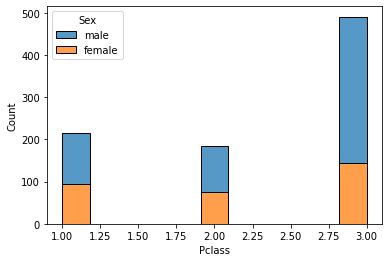

In [16]:
# How many men and women from each class survived
sns.histplot(data=train_df, x="Pclass",  hue = "Sex", multiple = "stack")


/home/shinde/.local/lib/python3.8/site-packages/seaborn/distributions.py:244: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot:xlabel='Age', ylabel='Count'>

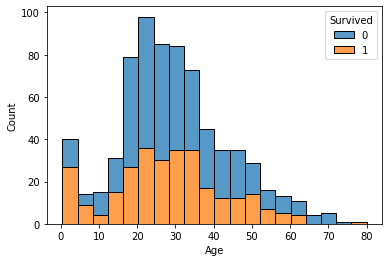

In [33]:
# Age distribution of the passengers

sns.histplot(data=train_df, x="Age",  hue = "Survived", multiple = "stack")
